#Plotting with matplotlib and seaborn

This tutorial combines material from the [SoftwareCarpentary Python tutorial](http://swcarpentry.github.io/python-novice-gapminder/), and...

## matplotlib introduction
matplotlib is a very popular Python library for creating plots. One of the original motivations behind matplotlib was to recreate the types of plotting functions avilable in MATLAB, hence the name. 

In [1]:
# Import MatPlotlib
%matplotlib inline
import matplotlib.pyplot as plt

Let's make a simple set of data and plot a line graph.

Text(0, 0.5, 'Position (km)')

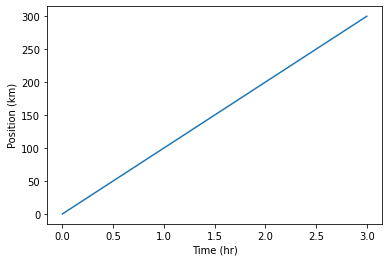

In [4]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')


In our CoLab notebook session, the plots will appear automatically once we execute each code cell. However, in a Python script or command-line session, we need to tell Python to display the plot with the following code:
`plt.show()`

## Plotting data from a Pandas DataFrame
Let's grab the Stockholm temperature data again, but this time load it as a Pandas DataFrame

In [18]:
!wget https://raw.githubusercontent.com/shaunmahony/BMMB554-2022/main/data/city-populations.csv

--2022-01-15 21:17:32--  https://raw.githubusercontent.com/shaunmahony/BMMB554-2022/main/data/city-populations.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9563 (9.3K) [text/plain]
Saving to: ‘city-populations.csv’

city-populations.cs 100%[===================>]   9.34K  --.-KB/s    in 0s      

2022-01-15 21:17:32 (70.5 MB/s) - ‘city-populations.csv’ saved [9563/9563]



In [19]:
!head city-populations.csv

City,Year,Population
Bangalore,1950,745999
Bangalore,1955,939396
Bangalore,1960,1165978
Bangalore,1965,1377314
Bangalore,1970,1614756
Bangalore,1975,2110599
Bangalore,1980,2812428
Bangalore,1985,3397214
Bangalore,1990,4042598


In [21]:
import numpy as np
import pandas as pd

data = pd.read_csv('city-populations.csv')

data.head()

,City,Year,Population
0,Bangalore,1950,745999
1,Bangalore,1955,939396
2,Bangalore,1960,1165978
3,Bangalore,1965,1377314
4,Bangalore,1970,1614756


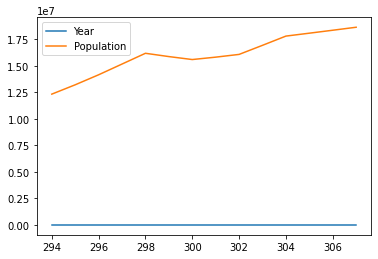

In [28]:
newyork = data.loc[data['City']=='New York']
newyork.plot()